In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("./input/Train/train.csv")
test = pd.read_csv("./input/Test/test.csv")

print("shape of train: ", train.shape, "shape of test: ", test.shape)

shape of train:  (7767, 563) shape of test:  (3162, 563)


In [6]:
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


Observation: Train data and test data is divided in approximately 70:30. There are no missing values.

## Visualizations for Train data

In [7]:
print(train.Activity.value_counts())

STANDING              1423
LAYING                1413
SITTING               1293
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     987
STAND_TO_LIE            90
SIT_TO_LIE              75
LIE_TO_SIT              60
LIE_TO_STAND            57
STAND_TO_SIT            47
SIT_TO_STAND            23
Name: Activity, dtype: int64


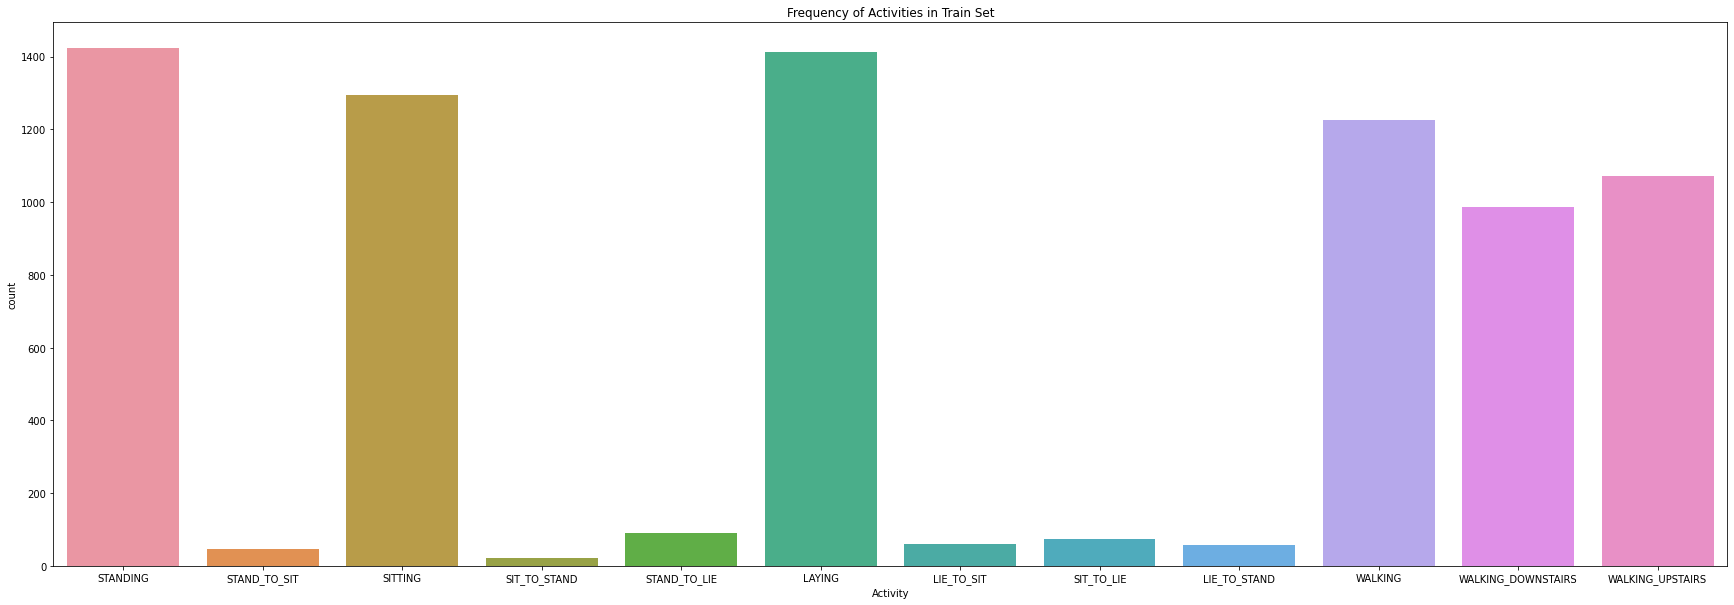

In [8]:
plt.figure(figsize = (30,10))
sns.countplot(x=train.Activity)
plt.xlabel('Activity')
plt.ylabel('count')
plt.title('Frequency of Activities in Train Set')
plt.show()

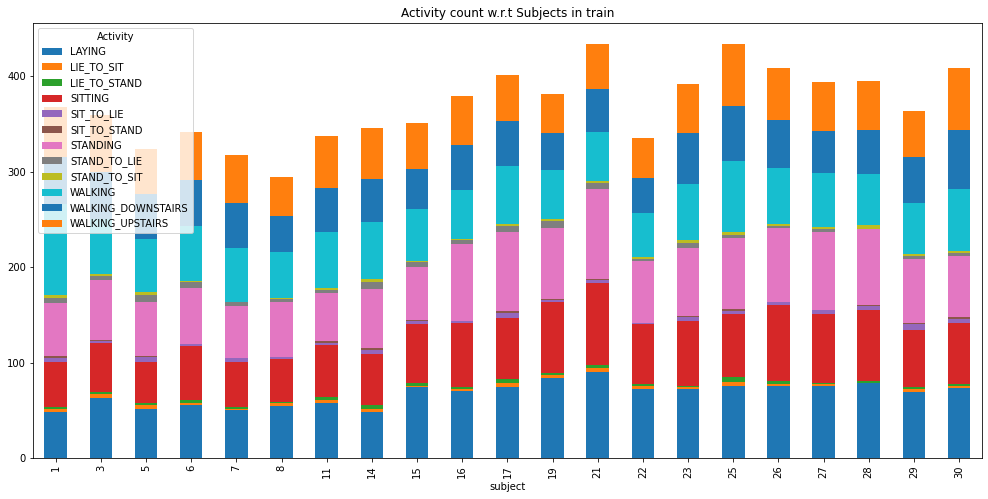

In [9]:
# Stacked Bar Chart for different activities with regards to subjects

stack_group = train.groupby(['subject', 'Activity']).size().unstack()
stack_group.plot(kind='bar', stacked=True, figsize=(17, 8), title = 'Activity count w.r.t Subjects in train')
plt.show()

## Visualizations for Test data

In [10]:
print(test.Activity.value_counts())

STANDING              556
LAYING                545
SITTING               508
WALKING               496
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
STAND_TO_LIE           49
SIT_TO_LIE             32
LIE_TO_STAND           27
LIE_TO_SIT             25
STAND_TO_SIT           23
SIT_TO_STAND           10
Name: Activity, dtype: int64


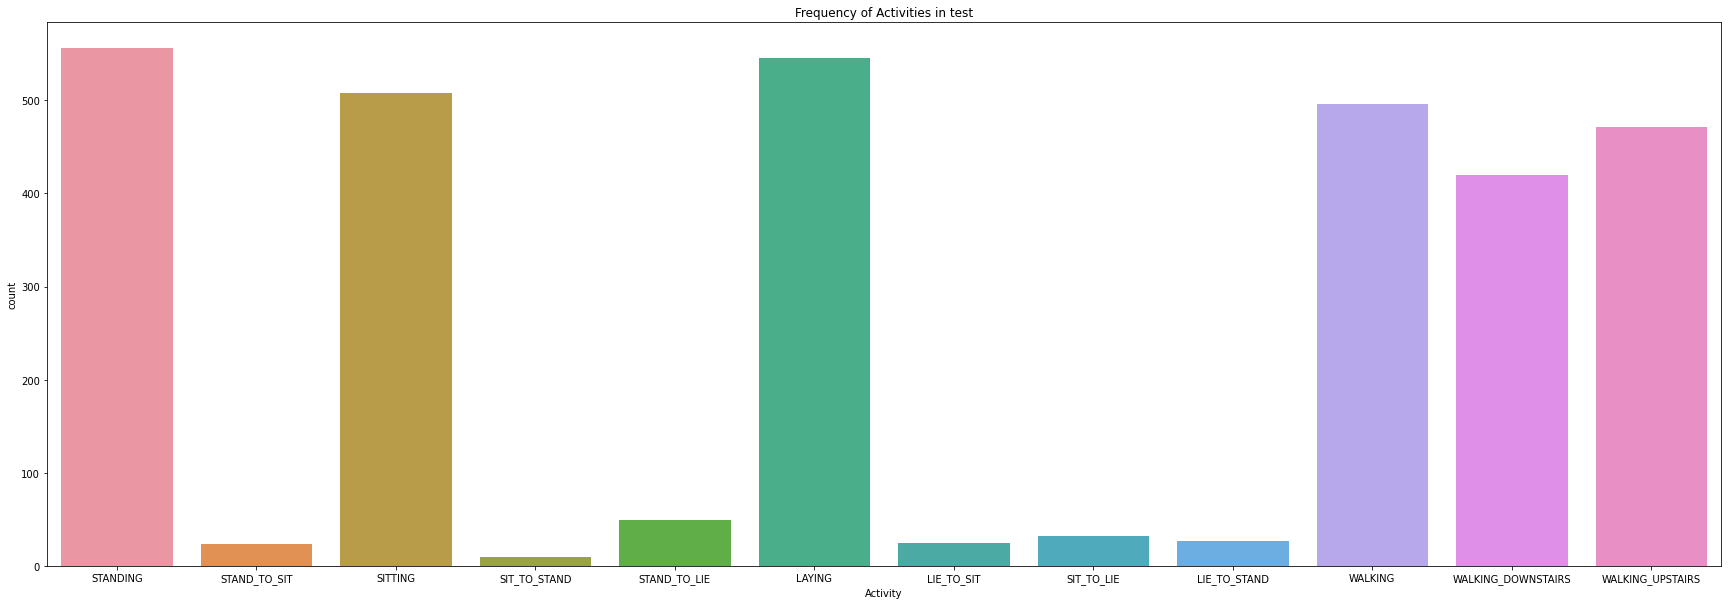

In [11]:
plt.figure(figsize = (30,10))
sns.countplot(x=test.Activity)
plt.xlabel('Activity')
plt.ylabel('count')
plt.title('Frequency of Activities in test')
plt.show()

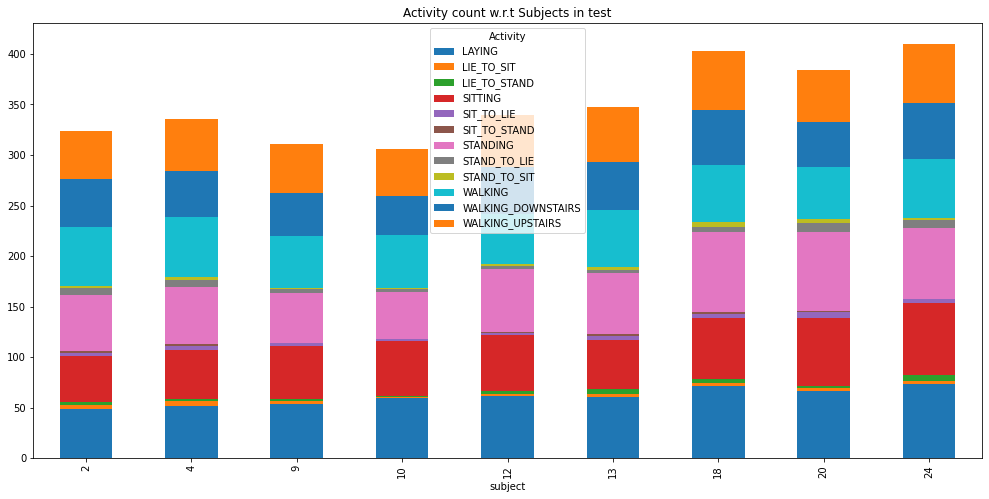

In [12]:
# Stacked Bar Chart for different activities with regards to subjects

stack_group = test.groupby(['subject', 'Activity']).size().unstack()
stack_group.plot(kind='bar', stacked=True, figsize=(17, 8), title = 'Activity count w.r.t Subjects in test')
plt.show()

### Principal Component Analysis (PCA)
We want to use PCA to reduce the the multidimension features in our data into fewer dimensions to better understand the data distribution. We are interested to find out whether the classes are separable using these selected principal components.

In [61]:
# First, we need to standardize the data to get better performance
from sklearn.preprocessing import StandardScaler
features = train.columns.values.tolist()
features.remove('Activity')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

#### 2 Components PCA

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PC = pca.fit_transform(x)
principalDf = pd.DataFrame(data = PC
             , columns = ['PC1', 'PC2'])

In [84]:
finalDf = pd.concat([principalDf, train[['Activity']]], axis = 1)

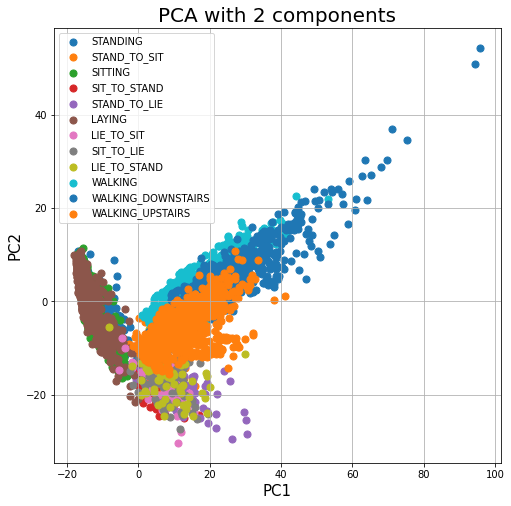

In [87]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA with 2 components', fontsize = 20)
targets = train['Activity'].unique()

for target in targets:
    indicesToKeep = finalDf['Activity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [88]:
pca.explained_variance_ratio_

array([0.4814824, 0.0808861])

From the result above we can see that the first principal component contains 48.15% of the variance and the second principal component contains 8.08% of the variance. Together, the two components contain 56.23% of the information, which is not very representative. The classes are also overlapping.

#### 3 Components PCA

In [89]:
pca3 = PCA(n_components=3)
PC3 = pca3.fit_transform(x)
principalDf3 = pd.DataFrame(data = PC3
             , columns = ['PC1', 'PC2', 'PC3'])

In [90]:
finalDf3 = pd.concat([principalDf3, train[['Activity']]], axis = 1)

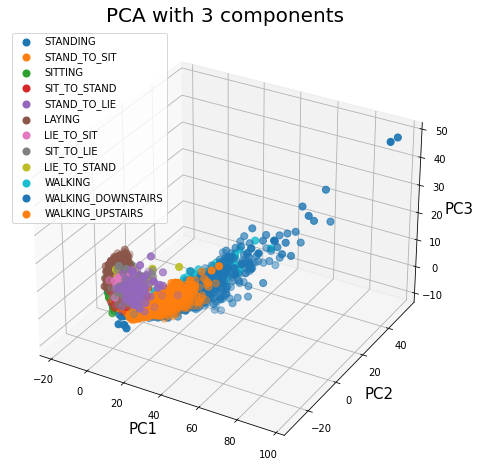

In [92]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('PCA with 3 components', fontsize = 20)
targets = train['Activity'].unique()

for target in targets:
    indicesToKeep = finalDf3['Activity'] == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'PC1']
               , finalDf3.loc[indicesToKeep, 'PC2']
               , finalDf3.loc[indicesToKeep, 'PC3']
               , s = 50)
ax.legend(targets)
ax.grid()

In [94]:
pca3.explained_variance_ratio_

array([0.4814824 , 0.0808861 , 0.03190478])

From the variance ratio above we can see that the first principal component contains 48.15% of the variance and the second principal component contains 8.08% of the variance, and the third principal component contains 3.19% of the variance. Together, the three components contain 59.42% of the information, which is still considerably small. The classes are again overlapping.